<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import io
import requests
import numpy as np
import tensorflow as tf 

response = requests.get('https://github.com/lukiepookieofficial/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true')
response.raise_for_status()
data = np.load(io.BytesIO(response.content))

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

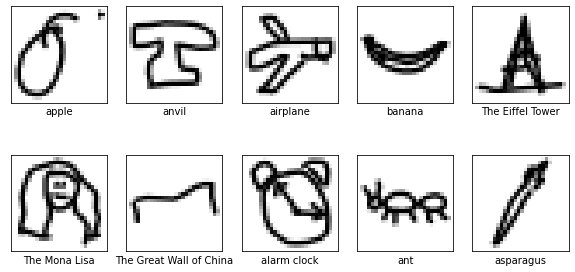

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [5]:
print(X.shape, y.shape)

(100000, 784) (100000,)


In [6]:
X[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   7,  27,  48,  71,  92, 112,  55,
         0,   0,   0,   0,   0,   0,   0, 179, 134,   0,   0,   0,   0,
         0,   0,   3,  37,  84, 129, 174, 220, 253, 255, 255, 255, 255,
       255, 181,   0,   0,   0,   0,   0,   0,   0, 221, 154,   0,  20,
        66, 111, 156, 203, 245, 255, 255, 249, 208, 163, 119,  94,  74,
        53,  30, 197, 183,   0,   0,   0,   0,   0,   0,   0, 236, 230,
       230, 255, 255, 255, 225, 180, 135,  89,  44,   5,   0,   0,   0,
         0,   0,   0,   0, 193, 183,   0,   0,   0,   0,   0,   0,   0,
       250, 219, 152, 106,  62,  16,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 193, 183,   0,   0,   0,   0,   0,
         0,   0, 241, 136,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
# # Flatten to turn all numbers into 0 thru 1 to normalize
X = X.astype('float32') /255
X[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02745098, 0.10588235, 0.1882353 , 0.2784314 , 0.36078432,
       0.4392157 , 0.21568628, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7019608 ,
       0.5254902 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.14509805, 0.32941177,
       0.5058824 , 0.68235296, 0.8627451 , 0.99215686, 1.     

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Instantiate the model
model = Sequential([
                    Dense(64, activation='relu', input_dim=784),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline = model.fit(X, y,
                     epochs=30,
                     validation_split=0.2)

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1329 - accuracy: 0.6555 - val_loss: 0.8522 - val_accuracy: 0.7544
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7847 - accuracy: 0.7720 - val_loss: 0.7421 - val_accuracy: 0.7851
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6954 - accuracy: 0.7964 - val_loss: 0.6833 - val_accuracy: 0.7972
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6394 - accuracy: 0.8128 - val_loss: 0.6331 - val_accuracy: 0.8146
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6016 - accuracy: 0.8234 - val_loss: 0.6069 - val_accuracy: 0.8223
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5721 - accuracy: 0.8302 - val_loss: 0.5879 - val_accuracy: 0.8269
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5486 - accuracy: 0.8372 - val_loss: 0.5728 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [11]:
baseline.history

{'accuracy': [0.6554874777793884,
  0.77201247215271,
  0.7963625192642212,
  0.8128125071525574,
  0.8233875036239624,
  0.83017498254776,
  0.8371999859809875,
  0.8432124853134155,
  0.8484249711036682,
  0.8533874750137329,
  0.8577374815940857,
  0.8621624708175659,
  0.8667374849319458,
  0.8698750138282776,
  0.8727625012397766,
  0.8766124844551086,
  0.879212498664856,
  0.8816375136375427,
  0.8829249739646912,
  0.8859750032424927,
  0.887624979019165,
  0.8899499773979187,
  0.8909124732017517,
  0.8924624919891357,
  0.8941624760627747,
  0.8961125016212463,
  0.89701247215271,
  0.8990749716758728,
  0.9007375240325928,
  0.9015250205993652],
 'loss': [1.1329113245010376,
  0.7846825122833252,
  0.6954333186149597,
  0.6393576264381409,
  0.6015580892562866,
  0.5721497535705566,
  0.5486173629760742,
  0.5283852219581604,
  0.5104231238365173,
  0.4939943850040436,
  0.4791770875453949,
  0.46515190601348877,
  0.45259082317352295,
  0.44094565510749817,
  0.430302232503

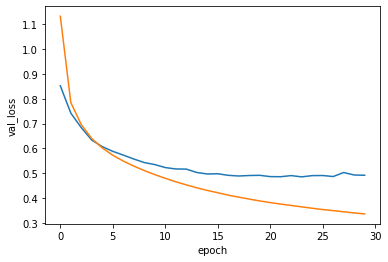

In [12]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [13]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [14]:
from tensorflow.keras.optimizers import Adam

adam = Adam()

# Instantiate the model
model = Sequential([
                    Dense(128, activation='sigmoid', input_dim=784),
                    Dense(64, activation='sigmoid'),
                    Dense(32, activation='sigmoid'),
                    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [16]:
baseline = model.fit(X, y, 
                     epochs=30,
                     validation_split=0.2)

Epoch 1/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6274 - accuracy: 0.8142 - val_loss: 0.5685 - val_accuracy: 0.8333
Epoch 2/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5126 - accuracy: 0.8467 - val_loss: 0.5132 - val_accuracy: 0.8493
Epoch 3/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.4554 - accuracy: 0.8651 - val_loss: 0.4957 - val_accuracy: 0.8546
Epoch 4/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.4152 - accuracy: 0.8778 - val_loss: 0.4736 - val_accuracy: 0.8606
Epoch 5/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3847 - accuracy: 0.8862 - val_loss: 0.4641 - val_accuracy: 0.8648
Epoch 6/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3585 - accuracy: 0.8953 - val_loss: 0.4824 - val_accuracy: 0.8568
Epoch 7/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3370 - accuracy: 0.9024 - val_loss: 0.4766 - val_accuracy:

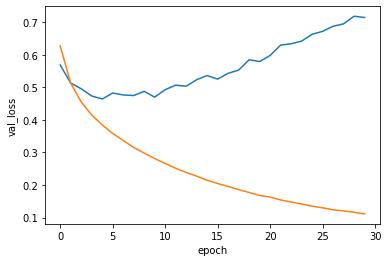

In [17]:
df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)